In [26]:
import qutip as qt
import numpy as np

# Tracking info of simulations 
import tqdm
import time
import warnings

#Saving data
import pandas as pd
import json
import os

import matplotlib.pyplot as plt
from IPython.display import Image
from matplotlib.gridspec import GridSpec

In [27]:
import sys
sys.path.append('/Users/omichel/Desktop/qilimanjaro/projects/quantum_transport/quantum_state_transfer/src')

import model_building as md
import Hamiltonian as Ham
import dynamics as dyn
import data_handling as dh
import plots as plots



# Initial test

In [28]:
# Define parameters
N=10
lmd = 0.02272
J = 0.5
state_dictionary = {"1":1}
#state_dictionary = {"1":1, "0":1}

ti = 0
tf = 150
Nsteps = 500

In [29]:
# Define intial and target systems
initial_state_DW, target_state_DW, register_size = md.create_DW_initial_and_target(state_dictionary, N, one_step = False)

In [30]:
#    def __init__(self, system_size, mode, lambda_factor, register_size=None, global_J=None,
#                 j_error = None, z_error = None, l_error = None):


H_t = Ham.Hamiltonian(system_size = N,
                    mode = "transport",
                    lambda_factor = lmd,
                    global_J = J,
                    j_error = 0.0,
                    l_error = 0.1,
                    z_error = 0.0
                    )
H_r = Ham.Hamiltonian(system_size = N,
                    mode = "reset",
                    lambda_factor = lmd,
                    register_size = register_size,
                    global_J = J,
                    j_error = 0.0,
                    l_error = 0.1,
                    z_error = 0.0
                    )

In [31]:
# Calibrate chain under ideal circumstances
transport_steps, transport_time = dyn.chain_calibration(initial_state_DW, H_t, ti, tf, Nsteps)

print(transport_steps, transport_time)

442 132.6


In [32]:
# test that algorithm works well without errors
fidelity, magnetizations = dyn.TwoStepAlgorithm(initial_state_DW, target_state_DW, H_t, H_r, ti, transport_time, transport_steps, factor = 1.12)

print(max(fidelity))

0.9734443451883819


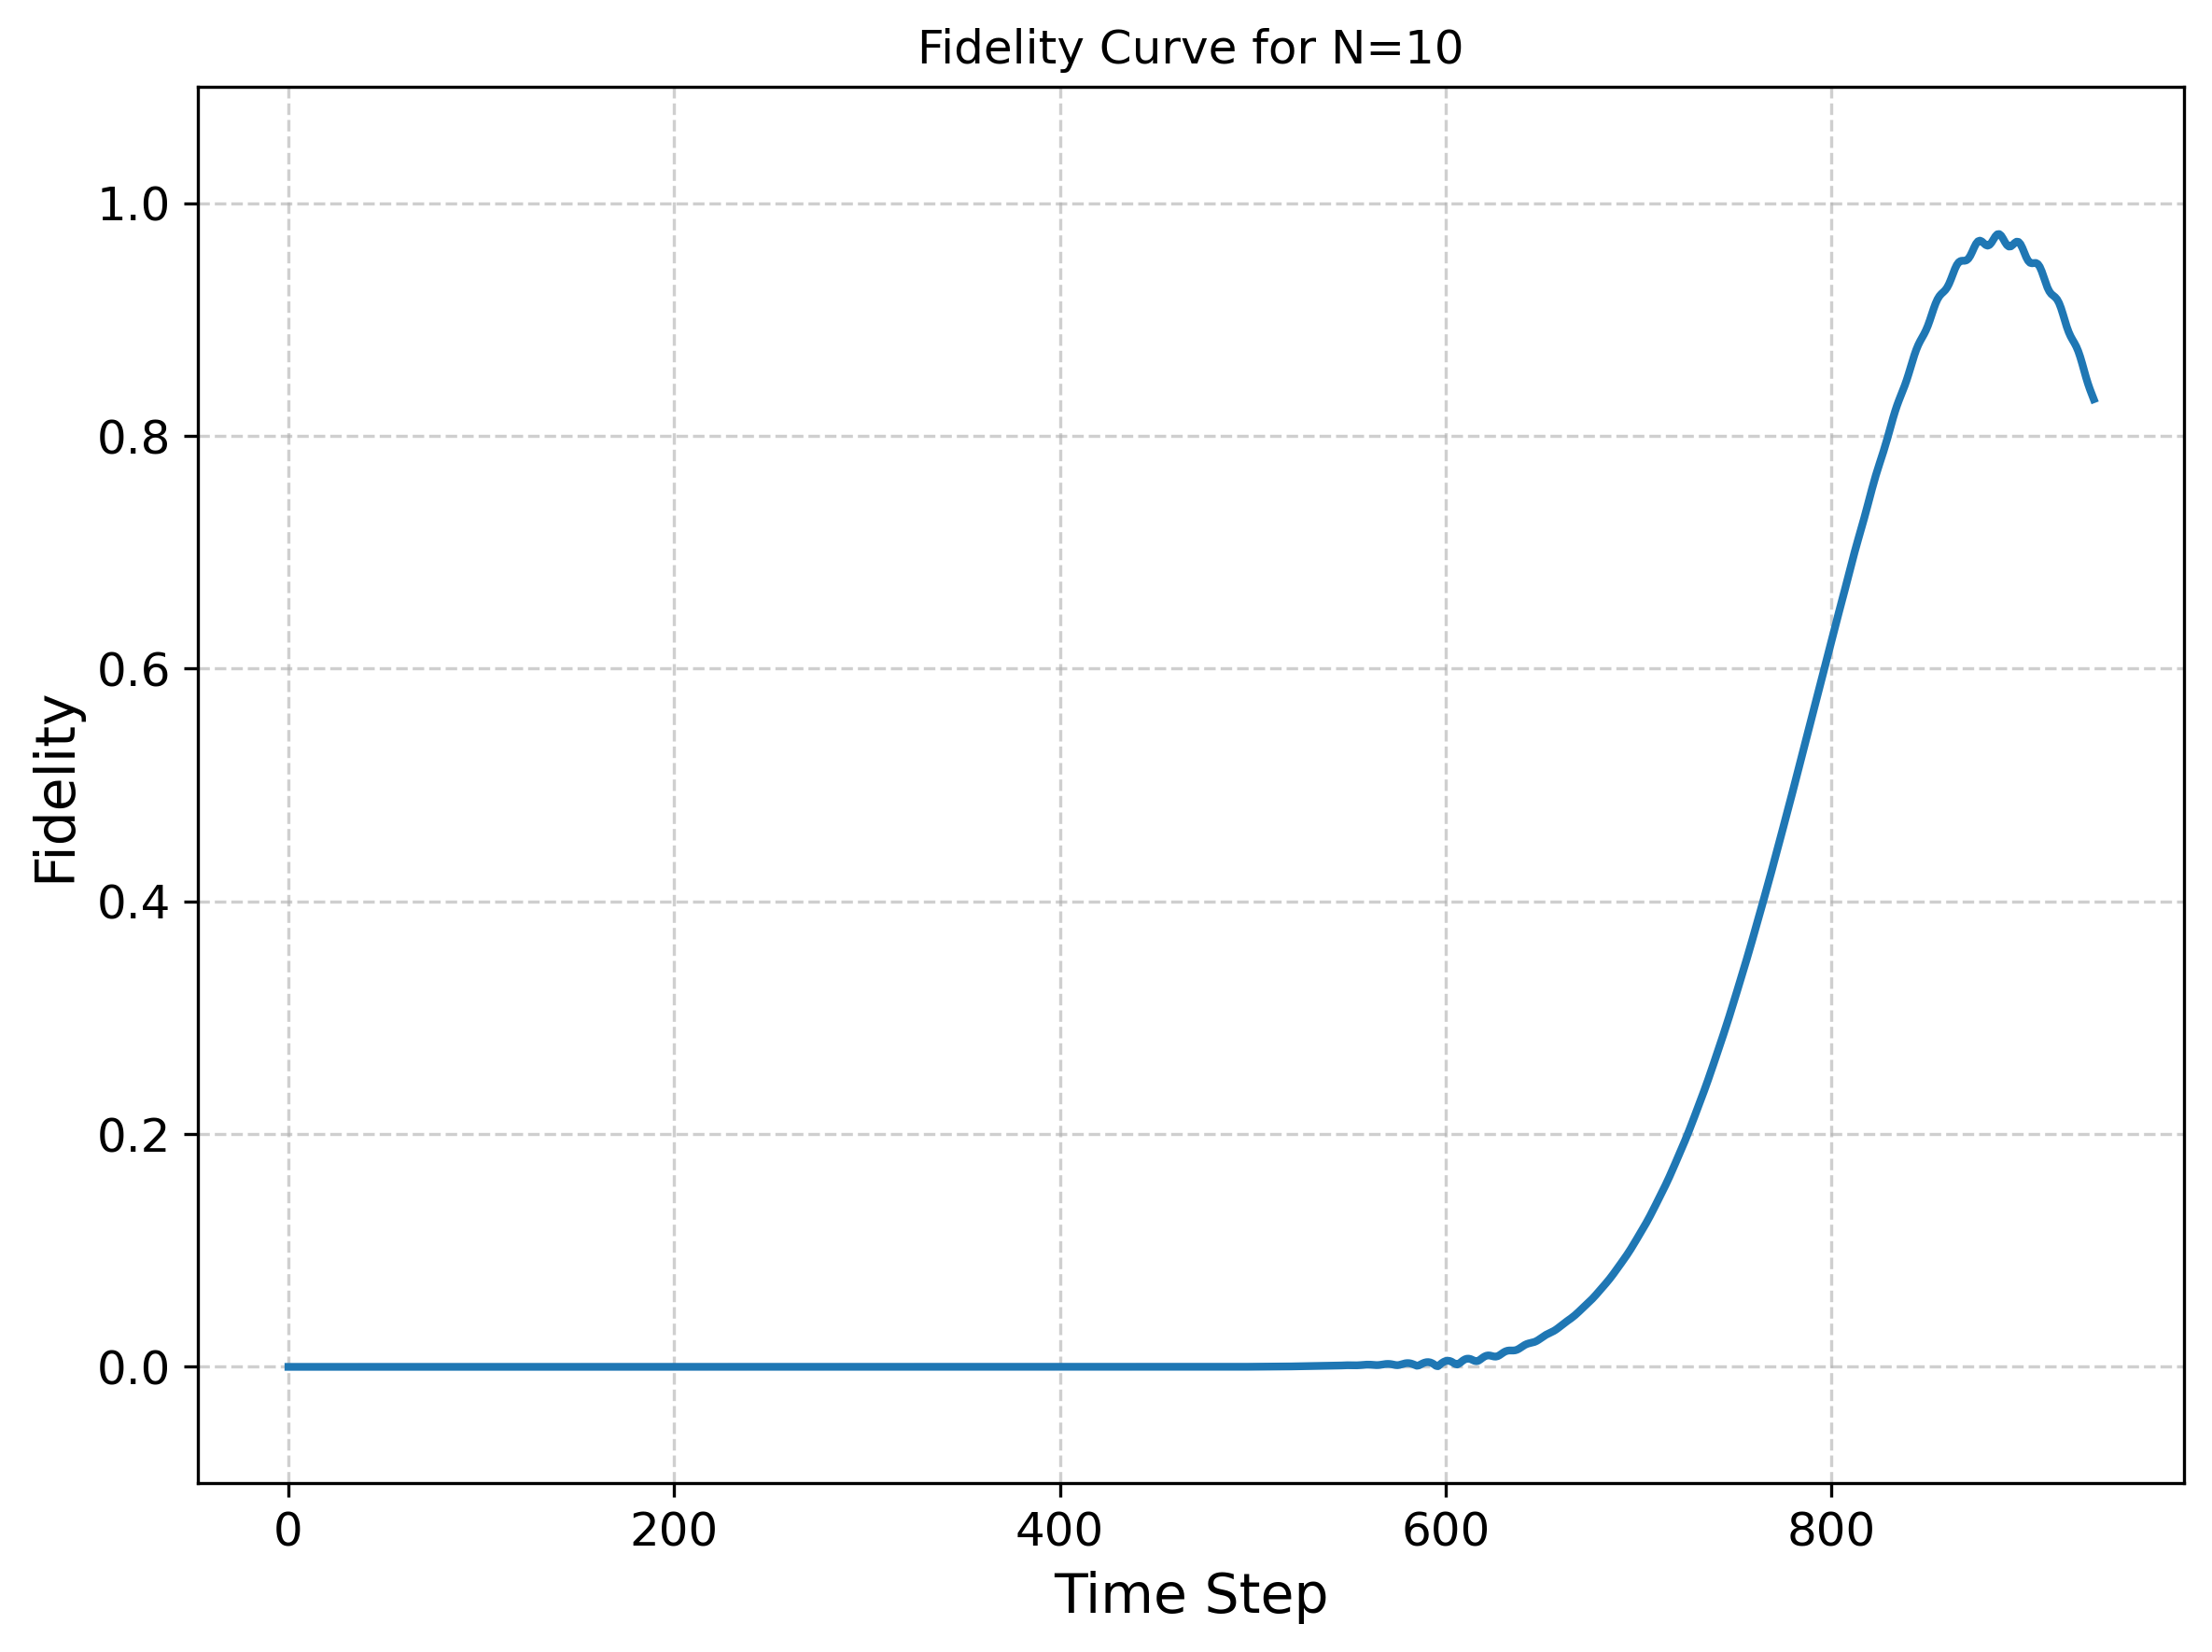

In [33]:
#Test plots
plots.plot_fidelity(fidelity, N)

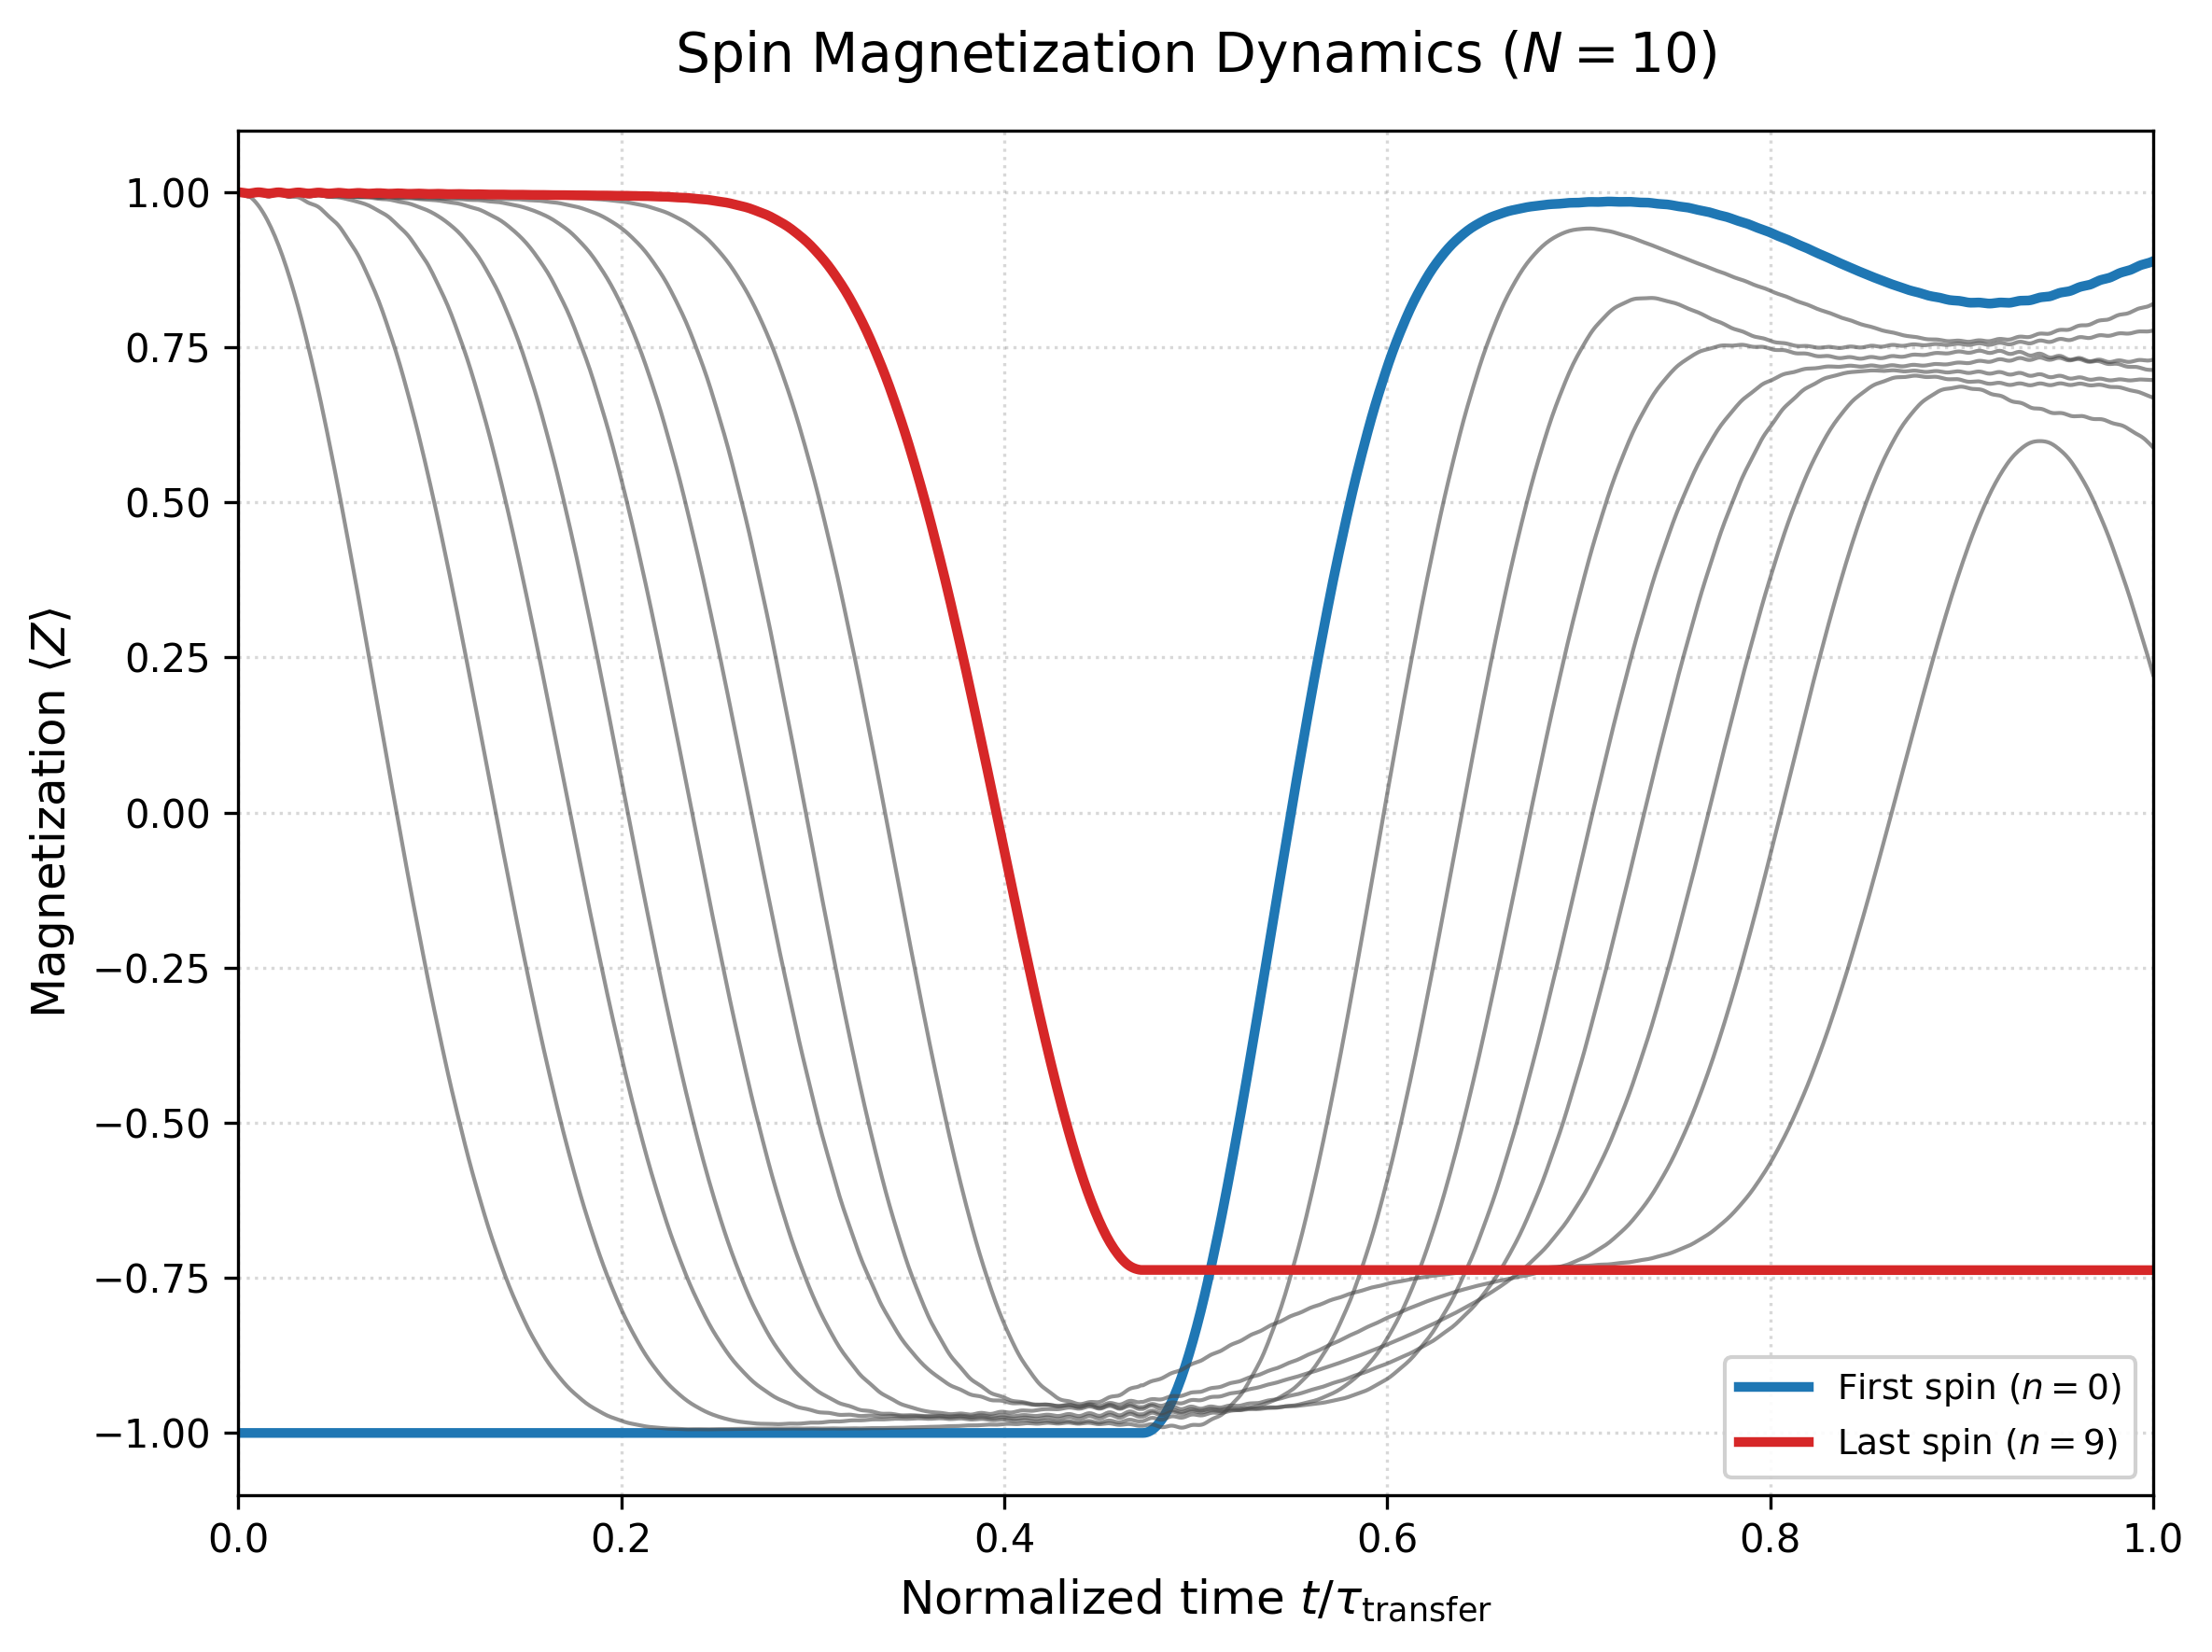

In [9]:
#Test plots
plots.plot_expectations(magnetizations["Sz"], N)

# Loop test

In [34]:
N=8
lmd = 0.02272
J = 0.5
state_dictionary = {"1":1}

ti = 0
tf = 200
Nsteps = 500

In [35]:
initial_state_DW, target_state_DW, register_size = md.create_DW_initial_and_target(state_dictionary, N, one_step = False)

In [36]:
# Define Hamiltonian without errors
H_t_noerror = Ham.Hamiltonian(system_size = N,
                    mode = "transport",
                    lambda_factor = lmd,
                    global_J = J
                    )

In [37]:
# Calibrate chain under ideal circumstances
transport_steps, transport_time = dyn.chain_calibration(initial_state_DW, H_t_noerror, ti, tf, Nsteps)

print(transport_steps, transport_time)

345 138.0


0 0.01 0
0 0.019000000000000003 0
0 0.028000000000000004 0
0 0.037000000000000005 0
0 0.046000000000000006 0
0 0.05500000000000001 0
0 0.064 0
0 0.073 0
0 0.082 0
0 0.09100000000000001 0
0 0.1 0


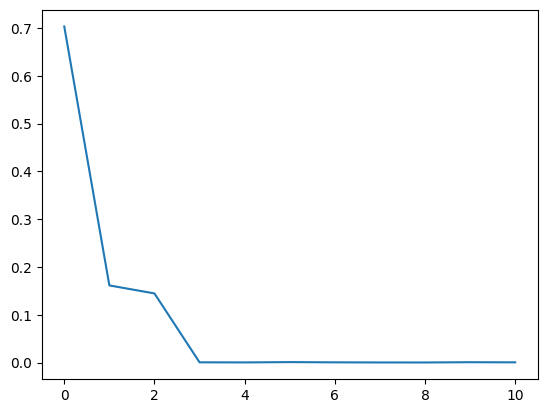

In [ ]:
l_errors = np.linspace(0.01, 0.1, 11)
fidelities = []

for l in l_errors:
    j_err, l_err, z_err = 0, l, 0

    H_t, H_r = Ham.build_hamiltonians(N, lmd, J, register_size, j_err, l_err, z_err)

    #Main loop
    fidelity = dyn.LightweightAlgorithm(initial_state_DW, target_state_DW, ti, transport_time, transport_steps, H_t, H_r)
    fidelities.append(fidelity)

plt.plot(range(len(l_errors)), fidelities)


# Standard encoding

In [ ]:
# Define parameters
N=11
lmd = 0.02272
J = 0.5

state_dictionary = {"1":1, "0":1}

ti = 0
tf = np.pi/lmd
Nsteps = 500

In [ ]:
initial_state_ST, target_state_ST = md.create_ST_initial_and_target(state_dictionary, N)

# Standard version
H_s = Ham.Hamiltonian(system_size = N,
                    mode = "standard",
                    lambda_factor = lmd,
                    l_error = 0.001,
                    z_error = 0.005
                    )


In [ ]:
# test that algorithm works well without errors
fidelity, magnetizations, corrected_fidelity = dyn.OneStepAlgorithm(initial_state_ST, target_state_ST, H_s, ti, tf, Nsteps, factor = 1.00)


print(max(fidelity))
print(fidelity[-1])

0.9806224601157576
0.9721999432422994


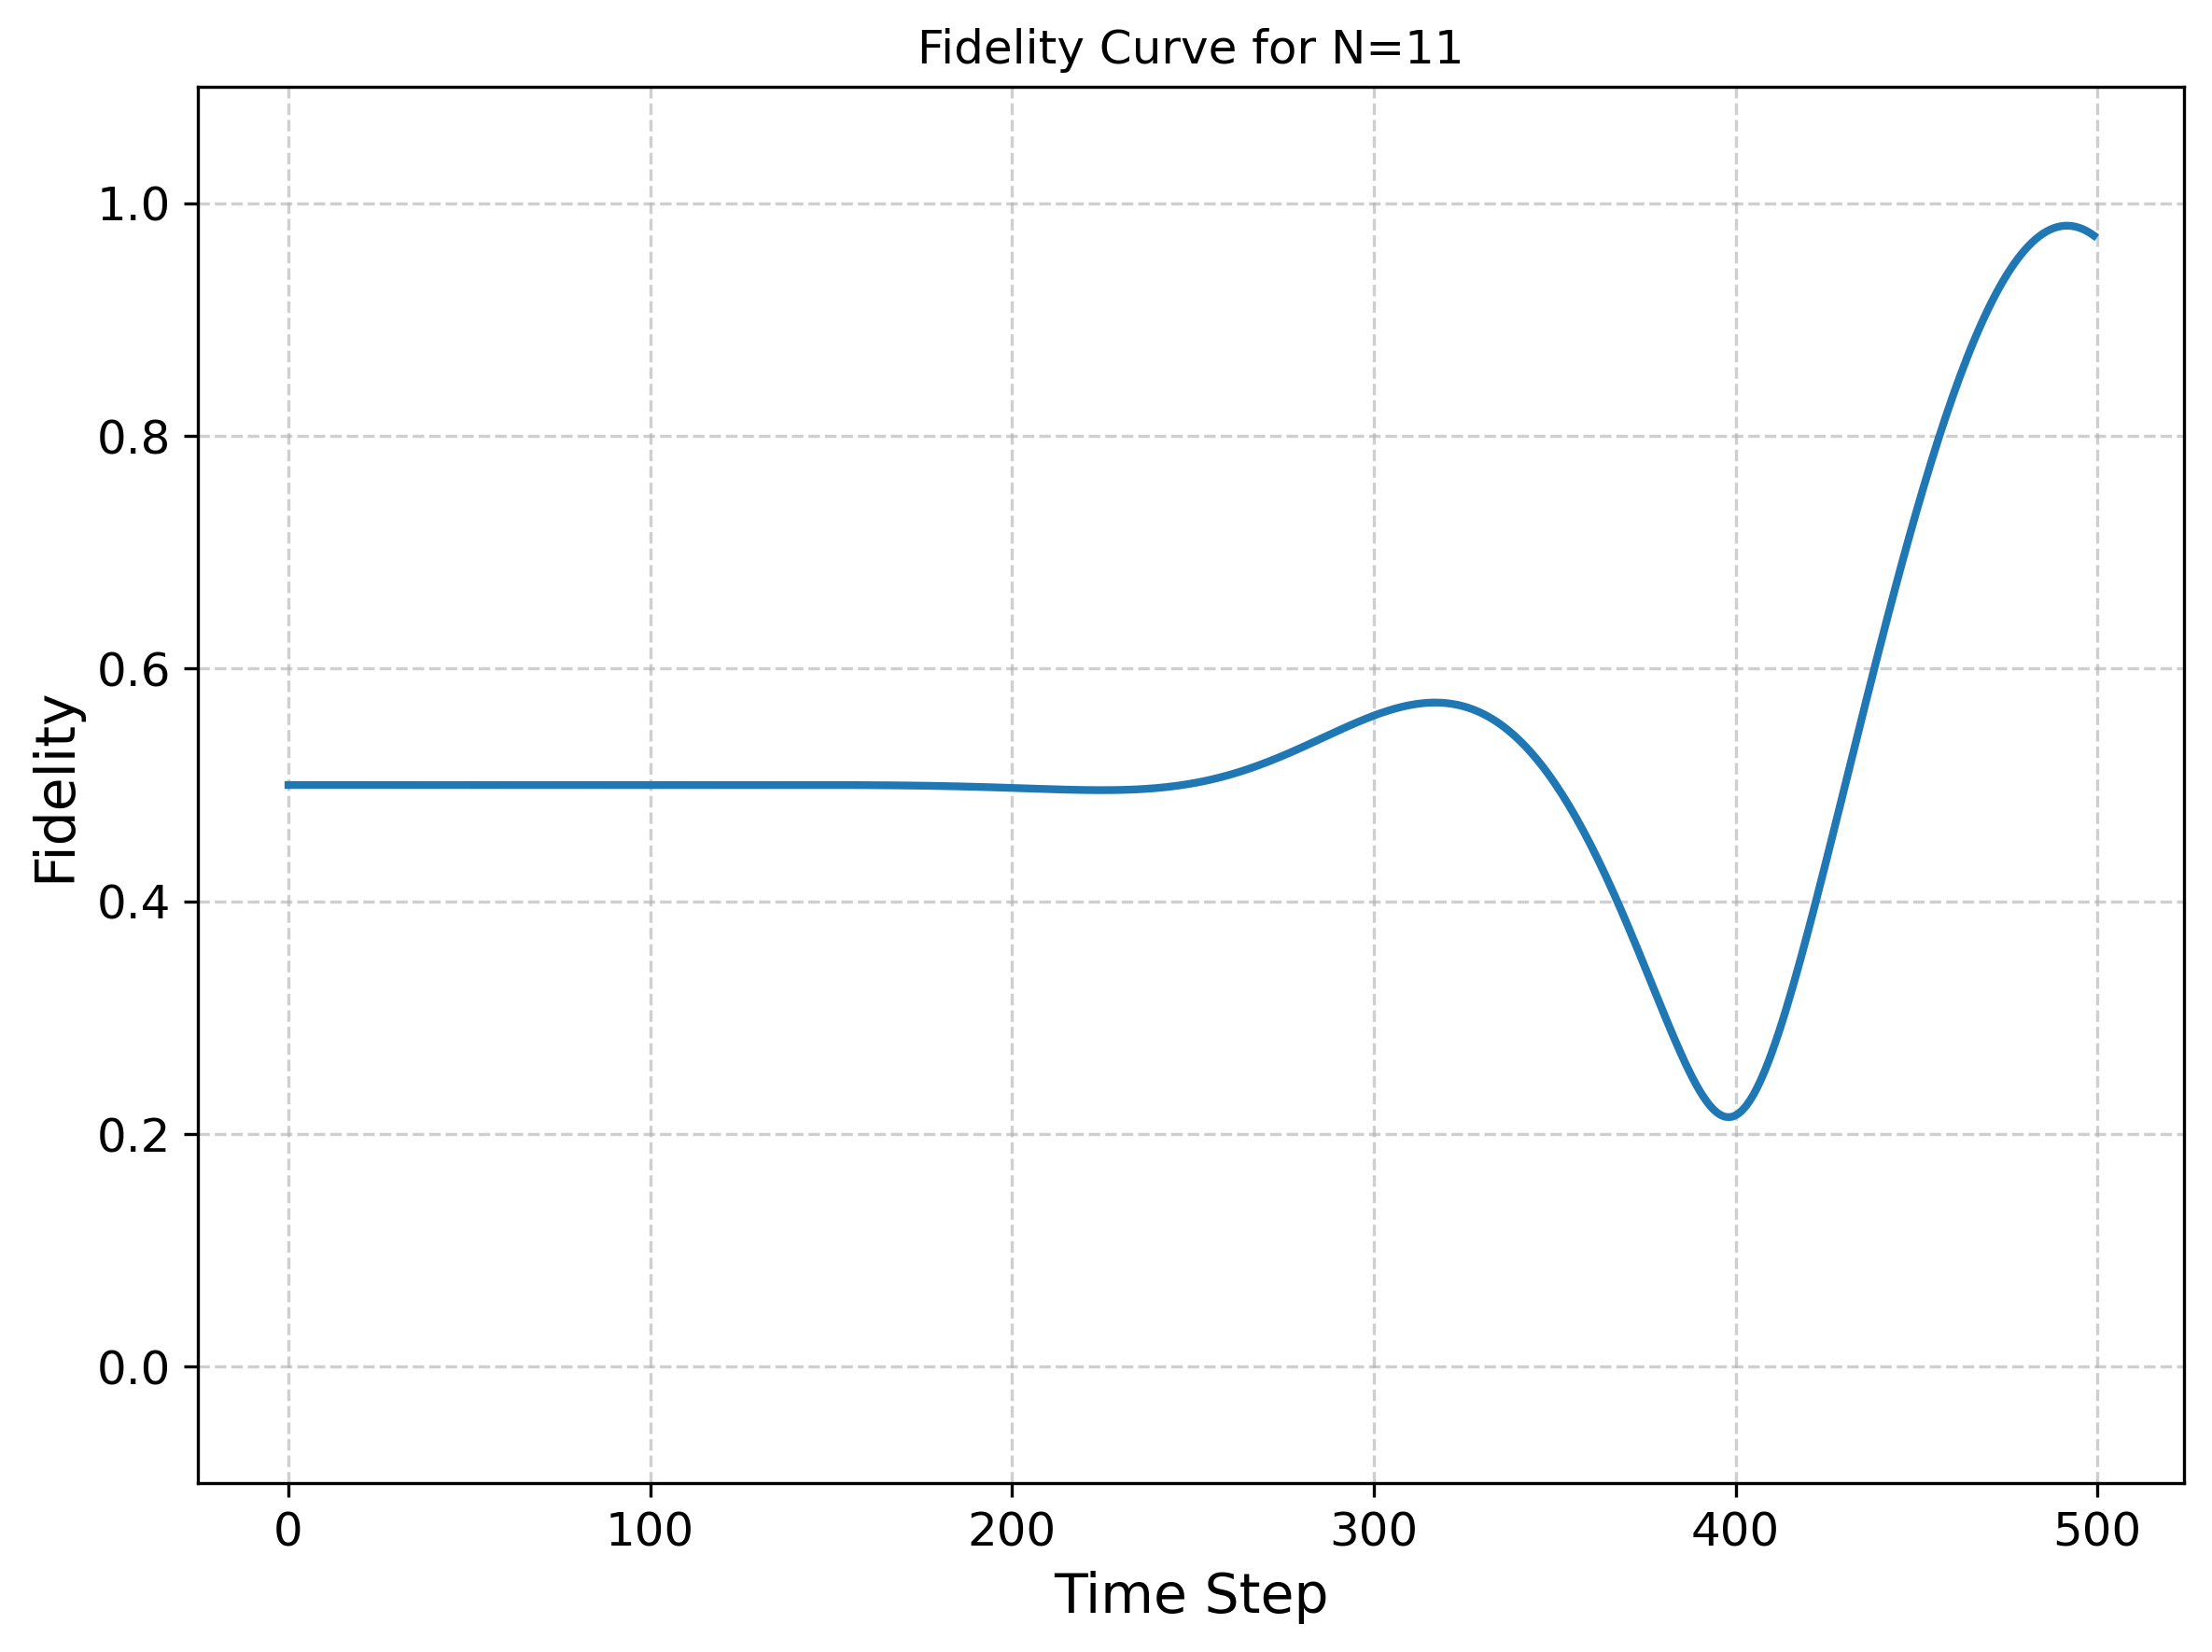

In [ ]:
#Test plots
plots.plot_fidelity(fidelity, N)

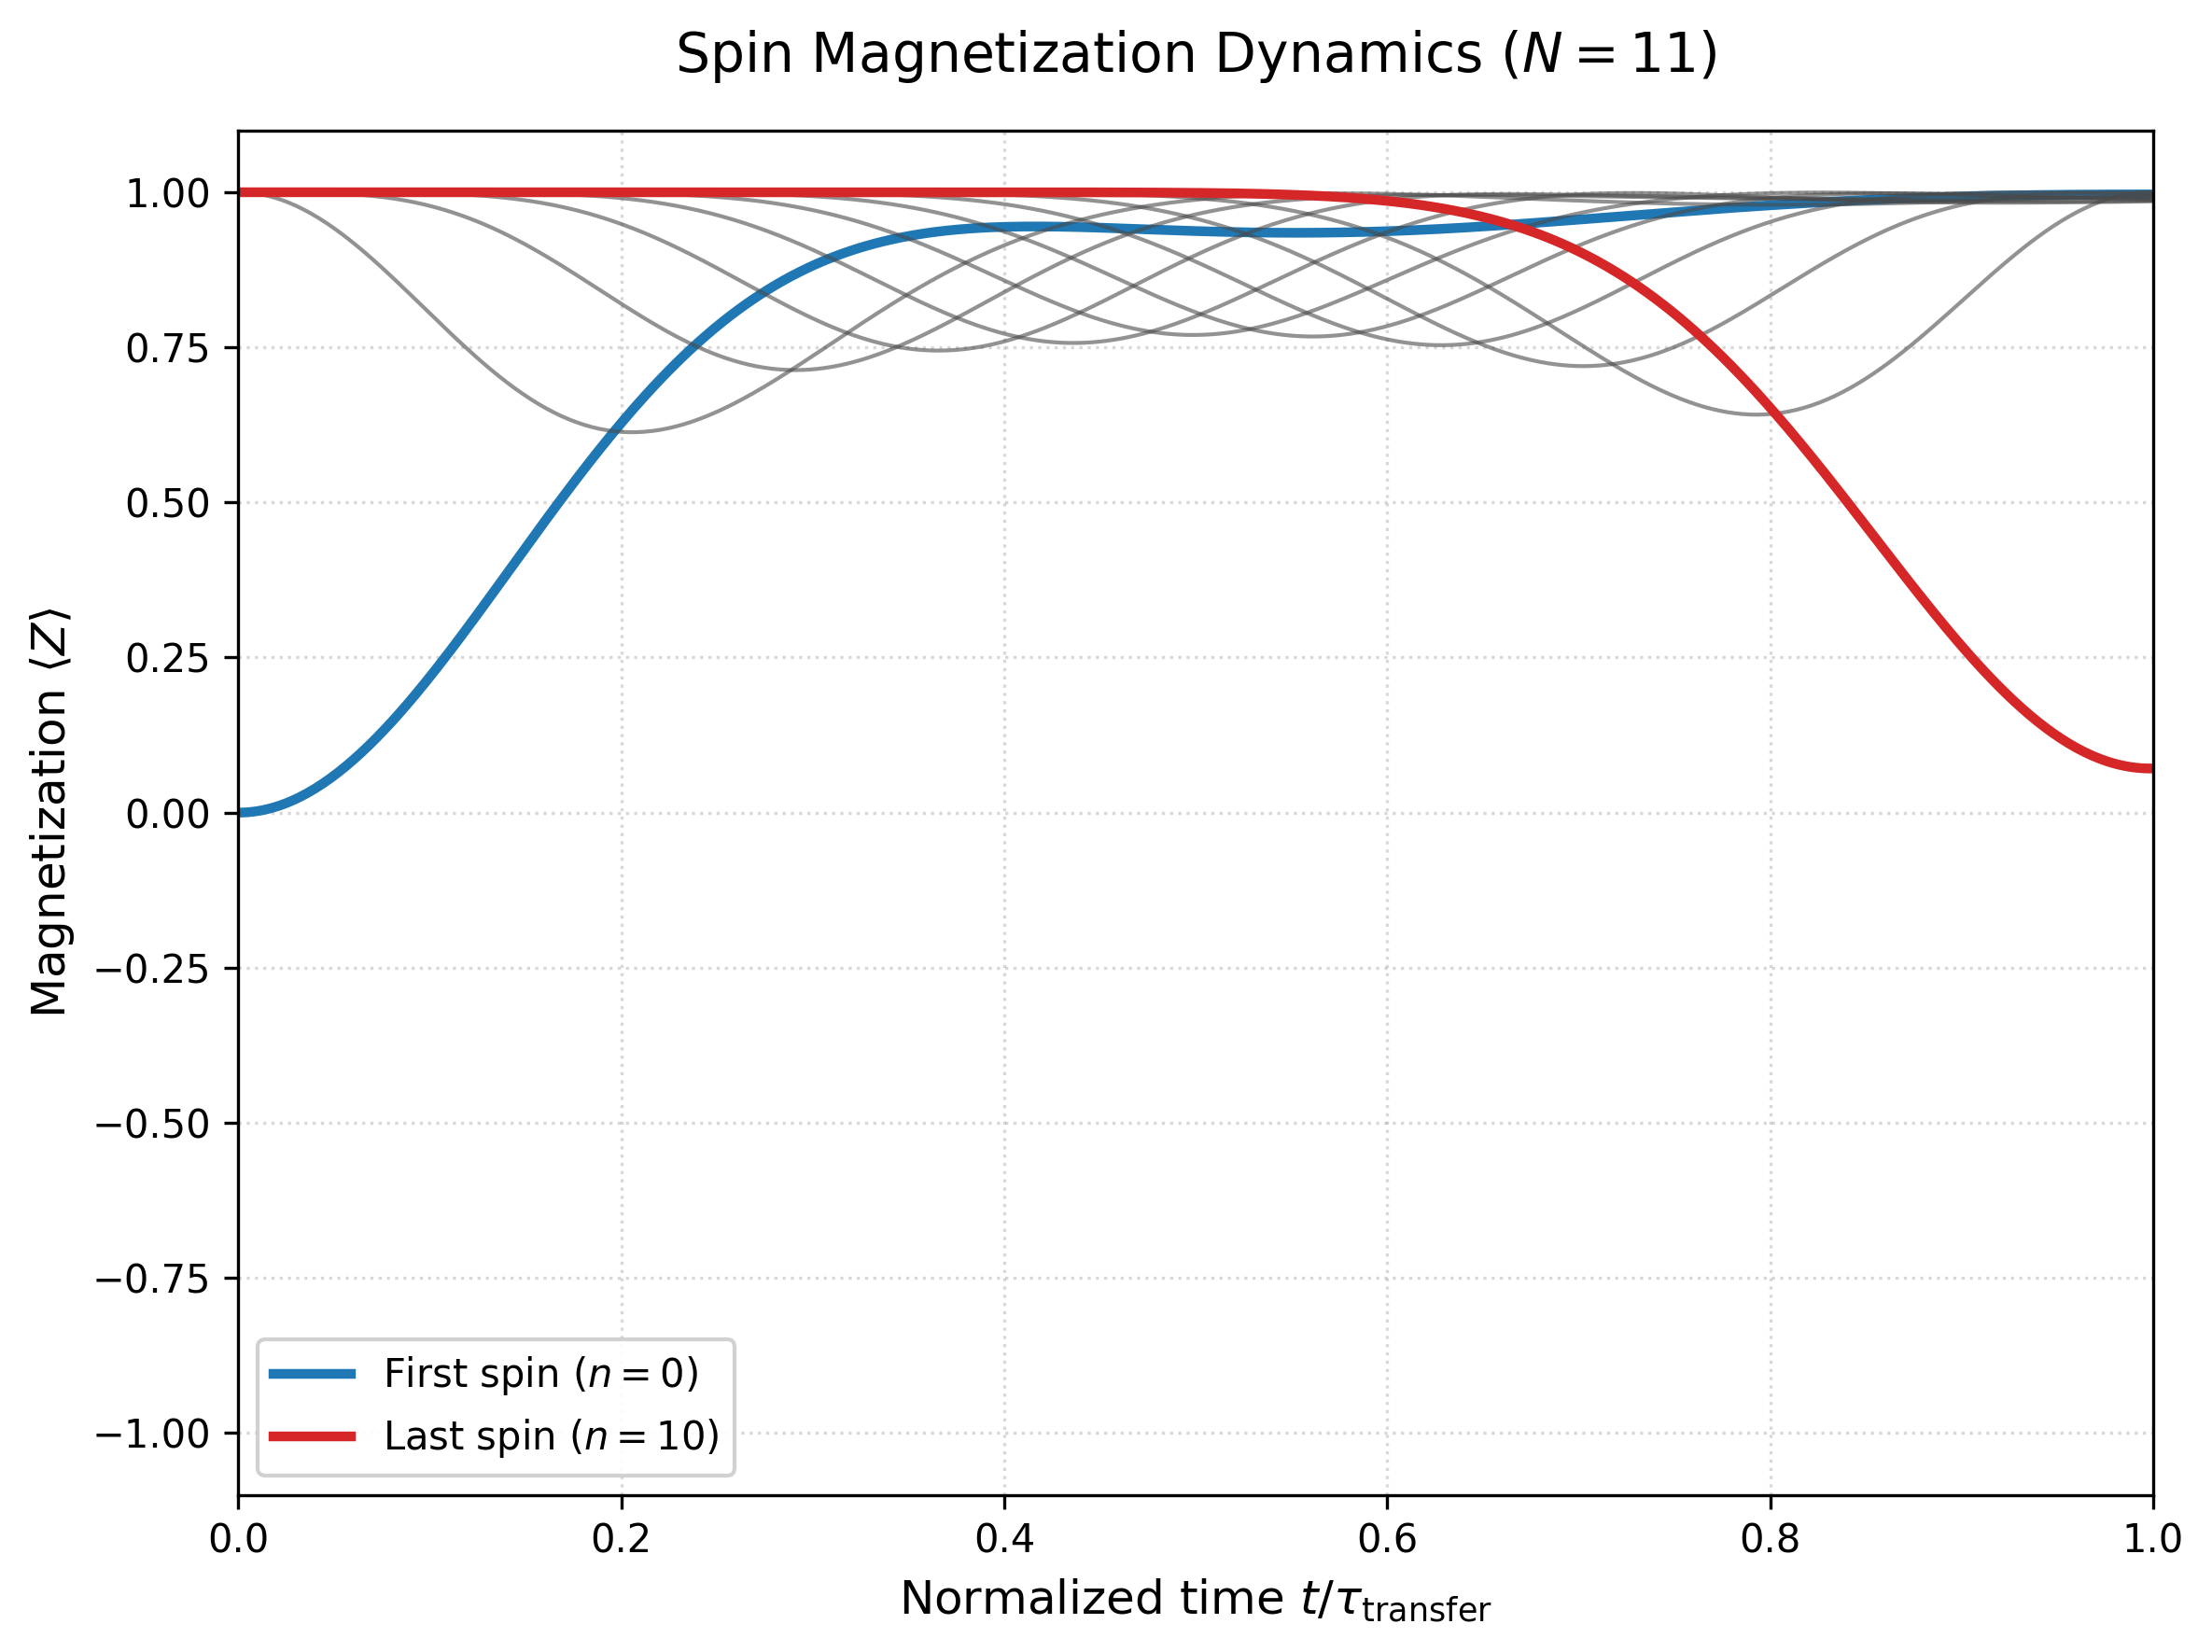

In [ ]:
#Test plots
plots.plot_expectations(magnetizations["Sz"], N)